Observed counts: [30 43 27]


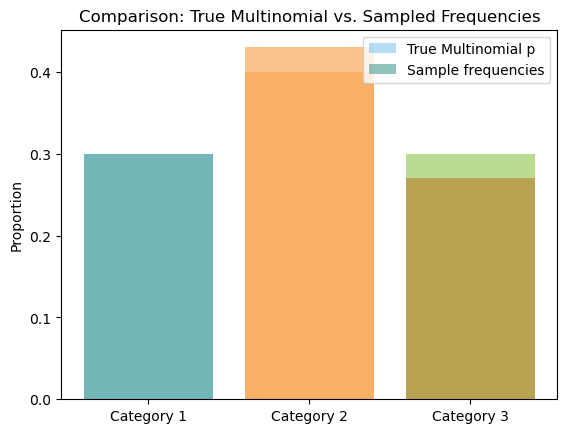

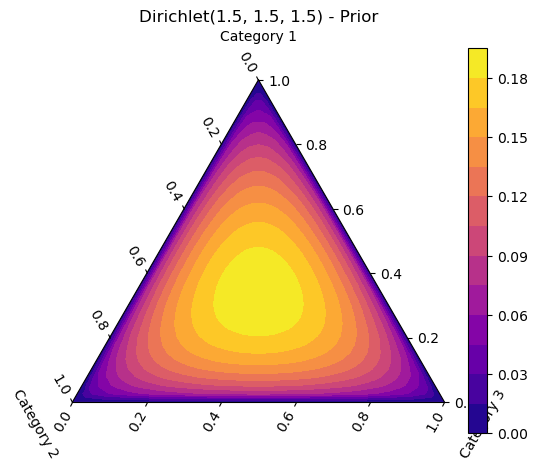

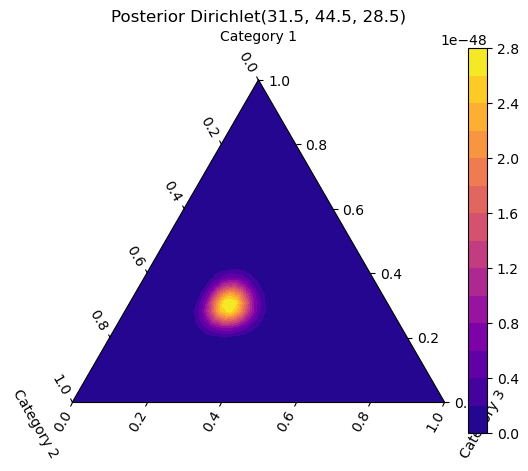

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Install mpltern for ternary plots if not already installed
!pip install mpltern

import mpltern

# 1) Generate a sample from a multinomial distribution with three categories
np.random.seed(50)  # Fixing the seed to ensure reproducibility
probabilities = [0.3, 0.4, 0.3]  # Adjusting the category probabilities
total_trials = 100
sample_counts = np.random.multinomial(total_trials, probabilities)
print("Observed counts:", sample_counts)

# 2) Visualize the true distribution vs. observed sample frequencies
categories = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories, probabilities, alpha=0.6, label='True Multinomial p', color=['#80C5E8', '#FFAD5C', '#8BC34A'])
plt.bar(categories, sample_counts/total_trials, alpha=0.6, label='Sample frequencies', color=['#4B9B91', '#F59C42', '#BB7D2A'])
plt.title("Comparison: True Multinomial vs. Sampled Frequencies")
plt.ylabel("Proportion")
plt.legend()
plt.show()

# 3) Define a Dirichlet prior
prior_alpha = np.array([1.5, 1.5, 1.5])  # A slightly modified prior to reflect balanced beliefs

# 4) Visualizing the Dirichlet prior using a ternary plot (Revised Approach)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(projection='ternary', ternary_sum=1.0)

# Set ternary plot labels and title
ax.set_tlabel("Category 1")
ax.set_llabel("Category 2")
ax.set_rlabel("Category 3")
ax.set_title("Dirichlet(1.5, 1.5, 1.5) - Prior")

# New approach: creating a mesh grid for the ternary plot
grid_size = 40
s1_vals, s2_vals = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))
s3_vals = 1 - s1_vals - s2_vals  # Ensuring the sum of the categories equals 1

# Mask invalid points where s3_vals would be negative (out of the 2-simplex)
valid_mask = s3_vals >= 0
s1_vals = s1_vals[valid_mask]
s2_vals = s2_vals[valid_mask]
s3_vals = s3_vals[valid_mask]

# Calculate Dirichlet density for each valid point
prior_density = (s1_vals**(prior_alpha[0]-1) *
                 s2_vals**(prior_alpha[1]-1) *
                 s3_vals**(prior_alpha[2]-1))

# Create the ternary contour plot
contour = ax.tricontourf(s1_vals, s2_vals, s3_vals, prior_density, levels=15, cmap='plasma')

# Add color bar for the density scale
fig.colorbar(contour, ax=ax)

plt.show()

# 6) Visualizing the posterior Dirichlet distribution using a ternary plot (Revised Approach)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(projection='ternary', ternary_sum=1.0)

# Set ternary plot labels and title for posterior
ax.set_tlabel("Category 1")
ax.set_llabel("Category 2")
ax.set_rlabel("Category 3")
ax.set_title(f"Posterior Dirichlet({updated_alpha[0]}, {updated_alpha[1]}, {updated_alpha[2]})")

# New approach: creating a mesh grid for the posterior ternary plot
s1_vals, s2_vals = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))
s3_vals = 1 - s1_vals - s2_vals  # Ensuring the sum of the categories equals 1

# Mask invalid points where s3_vals would be negative (out of the 2-simplex)
valid_mask = s3_vals >= 0
s1_vals = s1_vals[valid_mask]
s2_vals = s2_vals[valid_mask]
s3_vals = s3_vals[valid_mask]

# Calculate Dirichlet density for each valid point in the posterior
posterior_density = (s1_vals**(updated_alpha[0]-1) *
                     s2_vals**(updated_alpha[1]-1) *
                     s3_vals**(updated_alpha[2]-1))

# Create the ternary contour plot for posterior
contour = ax.tricontourf(s1_vals, s2_vals, s3_vals, posterior_density, levels=15, cmap='plasma')

# Add color bar for the density scale
fig.colorbar(contour, ax=ax)

plt.show()